# Stork Diary

## 20200225 15:00 28.40买入万业企业 600641 100股

收盘时买入，后期应该盘中买入。买股票是投资不是投机，设定好交易策略，认赌要服输。

### MACD DIf DEA 红绿柱

$Dif = EMA_{12} - EMA_{26}$ 
DIF代表长短期均线之间的差，绝对值越大，代表股票上涨或下跌呈加速状态。
顶背离股价上涨 DIF下降，上涨势头越来越弱，曲线越来越到最高点
底背离  代表下跌势头减弱
DIF>0;则金叉适合买 死叉意味着上涨势头变弱
$DEA = DIF_9$
开盘价不一定等于收盘价

### 做T

做T需要流动资金，因此在投资时不要一波进，像定投股票
1.下降趋势
2.震荡趋势
3.上升趋势

## 20200226 跌300

## 20200226 跌141

## 20200301

避免短线频繁交易，不要尝试抓住每一次波动；避免逆势操作下跌很多时买入也未必好；避免重仓交易，留下流动资金；减少无意义的工作和干扰，时刻盯着报价系统，其实小波动是无意义的，试着重新开始。

# 量化系统 

## Numpy

### 初始化操作

In [7]:
import numpy as np
np.zeros(100)
np.zeros((3,2))
np.ones((3,2))
np.empty((2, 3, 3))

np_list = np.arange(10000)
np.ones_like(np_list)
np.zeros_like(np_list)

np.eye(3) #单位阵

data = [[1,2,3,4],[5,6,7,8]]
arr_np = np.array(data)
arr_np

np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

### 索引选取和切片操作

In [10]:
stork_cnt = 200
view_days = 504
stork_day_change = np.random.standard_normal((stork_cnt,view_days))
tmp  = stork_day_change[0:2,0:5].copy()
stork_day_change[0:2, 0:5] = stork_day_change[-2:, -5:]
stork_day_change[-2:, -5:] = tmp
stork_day_change[-2:, -5:] 

array([[-1.24458948,  0.12100969,  0.20964633,  0.78426014, -1.13266083],
       [ 0.07032375, -0.46521003, -0.80839282,  0.15016976,  0.94774359]])

### 数据转换与规整

In [13]:
#转换数据类型
stork_day_change[0:2 ,0:5].astype(int)
#保留小数点数位
np.around(stork_day_change[0:2 ,0:5],2)
#nan 数据处理
tmp_test = stork_day_change[0:2, 0:5].copy()
tmp_test[0][0] = np.nan
tmp_test

array([[        nan, -0.70811378,  0.96857743,  0.95027533,  0.45339739],
       [-0.04994816,  1.22658165, -1.57942391,  1.59261325,  0.65203405]])

In [15]:
tmp_test = np.nan_to_num(tmp_test)
tmp_test

array([[ 0.        , -0.70811378,  0.96857743,  0.95027533,  0.45339739],
       [-0.04994816,  1.22658165, -1.57942391,  1.59261325,  0.65203405]])

### 逻辑条件进行数据筛选

In [16]:
mask = stork_day_change[0:2, 0:5] >0.5
mask #bool

array([[False, False,  True,  True, False],
       [False,  True, False,  True,  True]])

In [17]:
tmp_test = stork_day_change[0:2, 0:5].copy()
tmp_test[mask]

array([0.96857743, 0.95027533, 1.22658165, 1.59261325, 0.65203405])

In [19]:
tmp_test[tmp_test>0.5] 
tmp_test[tmp_test>0.5] = 1

### 通用序列函数

In [20]:
np.all(mask)

False

In [21]:
np.any(mask)#是否有true

True

In [24]:
np.maximum(stork_day_change[0:2, 0:5],stork_day_change[-2:, -5:])

array([[-0.47333664,  0.12100969,  0.96857743,  0.95027533,  0.45339739],
       [ 0.07032375,  1.22658165, -0.80839282,  1.59261325,  0.94774359]])

In [26]:
change_int = stork_day_change[0:2 ,0:5].astype(int)
print(change_int)
np.unique(change_int)

[[ 0  0  0  0  0]
 [ 0  1 -1  1  0]]


array([-1,  0,  1])

In [28]:
print(stork_day_change[0:2, 0:5])
np.diff(stork_day_change[0:2, 0:5]) # 默认axis=1
np.diff(stork_day_change[0:2, 0:5],axis=0)

[[-0.47333664 -0.70811378  0.96857743  0.95027533  0.45339739]
 [-0.04994816  1.22658165 -1.57942391  1.59261325  0.65203405]]


array([[ 0.42338849,  1.93469544, -2.54800133,  0.64233793,  0.19863666]])

In [29]:
np.where(tmp_test>0.5, 1, 0) #
np.where(tmp_test>0.5, 1, tmp_test)
np.where(np.logical_and(tmp_test>0.5, tmp_test<1), 1, 0)
np.where(np.logical_or(tmp_test>0.5, tmp_test<-0.5), 1, 0)

array([[0, 1, 1, 1, 0],
       [0, 1, 1, 1, 1]])

## 基础统计概念与函数 

In [31]:
#np.max()
#np.min()
#np.std()
#np.mean()
stork_day_change_four = stork_day_change[:4, :4]
print(stork_day_change_four)
np.argmax(stork_day_change_four,axis=0)

[[-0.47333664 -0.70811378  0.96857743  0.95027533]
 [-0.04994816  1.22658165 -1.57942391  1.59261325]
 [ 0.51794467 -0.05347199  1.6771056   0.20543282]
 [-0.57182273  1.02294919  0.39288208 -0.67850236]]


array([2, 1, 2, 1])

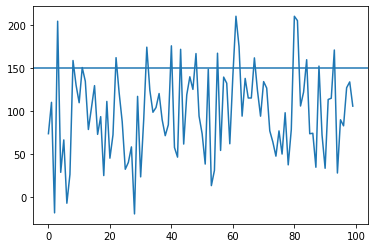

In [33]:
import matplotlib.pyplot as plt
a_investor = np.random.normal(loc=100,scale=50,size=(100,1))
plt.plot(a_investor)
plt.axhline(a_investor.mean()+a_investor.std())

###  histogram 和拟合曲线

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/gysun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


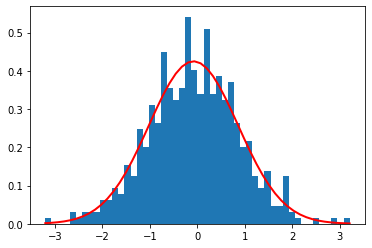

In [36]:
import scipy.stats as scs
plt.hist(stork_day_change[0],bins=50,normed=True)
fit_linspace = np.linspace(stork_day_change[0].min(),stork_day_change[0].max())
pdf = scs.norm(stork_day_change[0].mean(), stork_day_change[0].std()).pdf(fit_linspace)
plt.plot(fit_linspace,pdf, lw=2, c='r')